# Notebook for making confusion matrices

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Read in data

In [101]:
ntn_subjects = pd.read_csv('ntn_data_processed.csv')

In [102]:
def GetUncertaintyLabels(matrix_ntn_subjects):
    '''Helper function for generating confusion matrix labels'''
    labels = []
    nrows, ncols = matrix_ntn_subjects.shape
    for i in range(0,nrows):
        col_sum = matrix_ntn_subjects.iloc[:,i].sum()
        for k in range(0,ncols):
            val = matrix_ntn_subjects.iloc[k,i]
            n_val = (val/col_sum.astype(float))*100
            val_percent_round = "%.1f" % n_val
            lab_n = '%.1f%%'%n_val
            lab_v = '%d/%d'%(val,col_sum)
            lab='%.1f%%\n%d/%d' % (n_val, val, col_sum)
            labelc= str(lab_n)+"\n"+str(lab_v)
            label = f"{str(lab_n)} {str(lab_v)}"
            labels.append(str(lab))
    labels_array = np.asarray(labels)
    labels_val = labels_array.reshape(5,5)
    labels_new = labels_val.T
    return labels_new


In [103]:
types = ['Skimming','Cascade','Through-Going\nTrack','Starting\nTrack','Stopping\nTrack'] #labels

In [104]:
#match up labels
ntn_subjects = ntn_subjects.replace({'DNN Classification':['pred_skim','pred_cascade','pred_tgtrack','pred_starttrack','pred_stoptrack']},{'DNN Classification':[0,1,2,3,4]},regex=False)
ntn_subjects = ntn_subjects.replace({'User Consensus Classification':['Skimming Track','Cascade','Through-Going Track','Starting Track','Stopping Track']},{'User Consensus Classification':[0,1,2,3,4]},regex=False)
ntn_subjects = ntn_subjects.replace({'truth_classification':['skimming_track','uncontained_cascade','contained_em_hadr_cascade', 'contained_hadron_cascade', 'throughgoing_track','starting_track','stopping_track']},{'truth_classification':[0,0,1,1,2,3,4]},regex=False)
ntn_subjects = ntn_subjects.replace({'corsika_label':['skimming_track','stopping_track','stopping_bundle', 'throughgoing_track', 'throughgoing_bundle', 'unclassified']},{'corsika_label':[0,4,4,2,2,5]},regex=False)
corsika_class = list(ntn_subjects['corsika_label'])
truth_class = list(ntn_subjects['truth_classification'])

## Original (no cuts) user vs. MC 

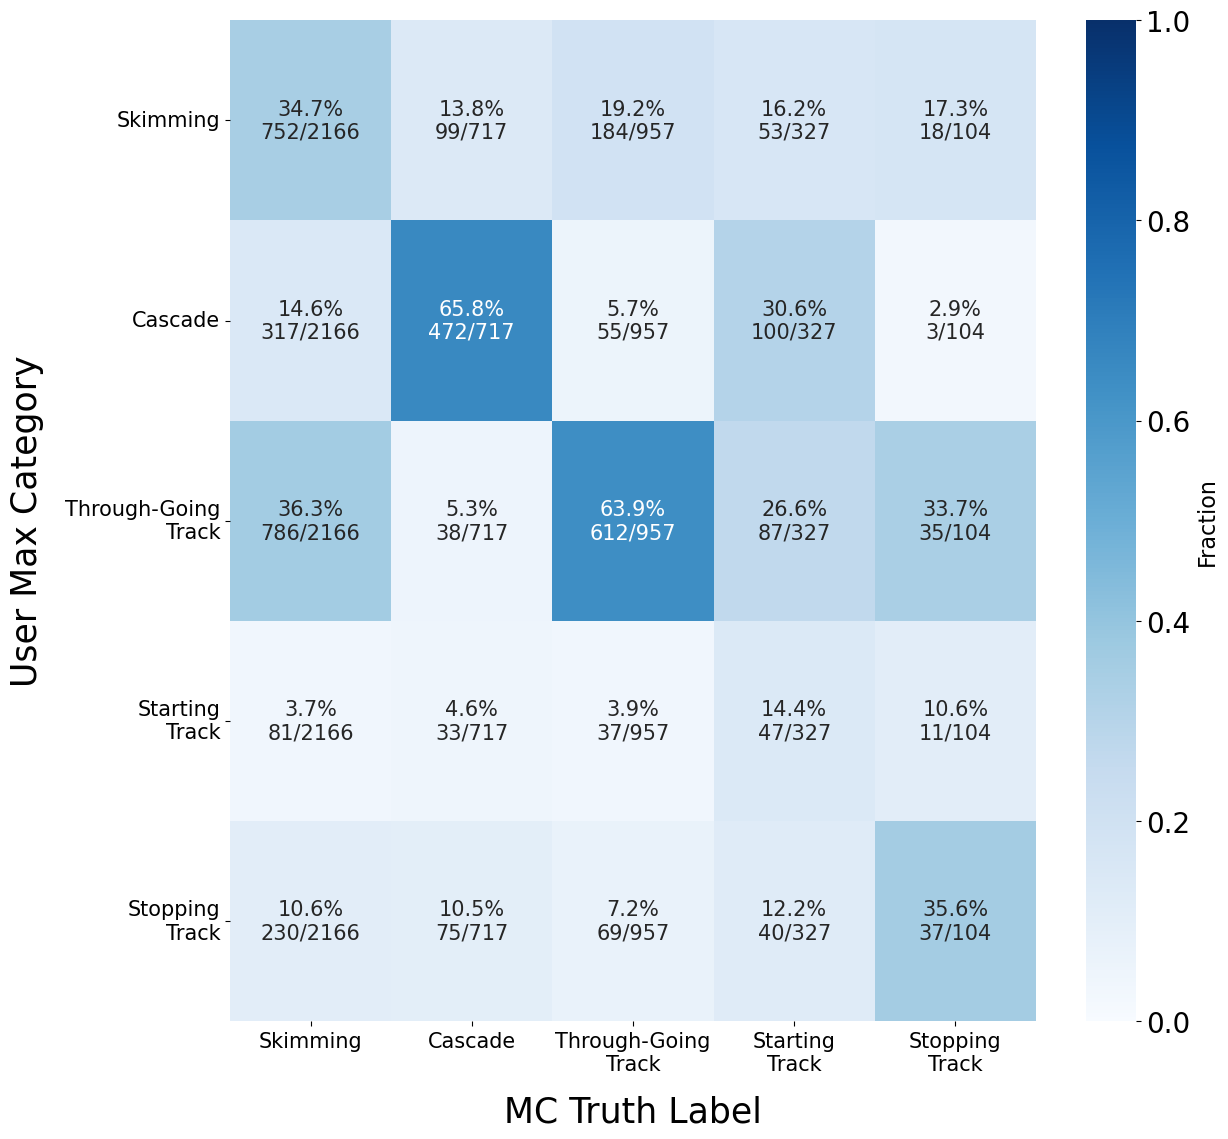

In [105]:
conf_norm = pd.crosstab(ntn_subjects['User Consensus Classification'], ntn_subjects['truth_classification'], rownames=['User Max Category'], colnames=['MC Truth Label'], margins=False,normalize='columns')
conf = pd.crosstab(ntn_subjects['User Consensus Classification'], ntn_subjects['truth_classification'], rownames=['User Max Category'], colnames=['MC Truth Label'], margins=False)
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(conf_norm, annot=GetUncertaintyLabels(conf), annot_kws={"size": 15}, fmt='',cmap='Blues',xticklabels=types,yticklabels=types,vmin=0.0,vmax=1.0,cbar_kws={'label':'Fraction'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Fraction',fontsize=16)
plt.ylabel('User Max Category',fontsize=25,labelpad=15)
plt.xlabel('MC Truth Label',fontsize=25,labelpad=15)
plt.yticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15", va="center")
plt.xticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15")
plt.show()

In [106]:
qratio = np.divide(ntn_subjects['bg_charge'], ntn_subjects['qtot'])
ntn_subjects.insert(0, 'qratio', qratio)

### Histograms of qratio for each category

Text(0.5, 1.0, 'Q background / Q total\nAll MC Stop')

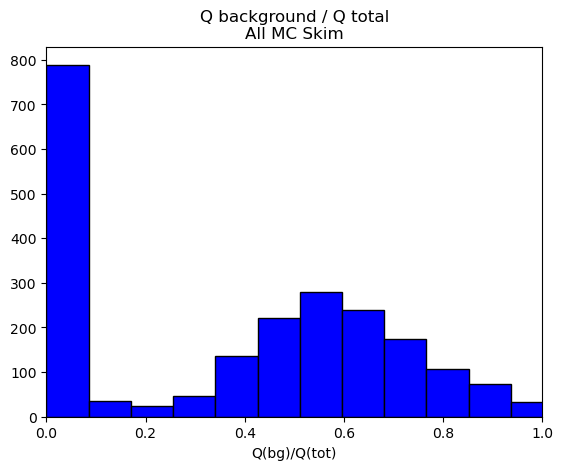

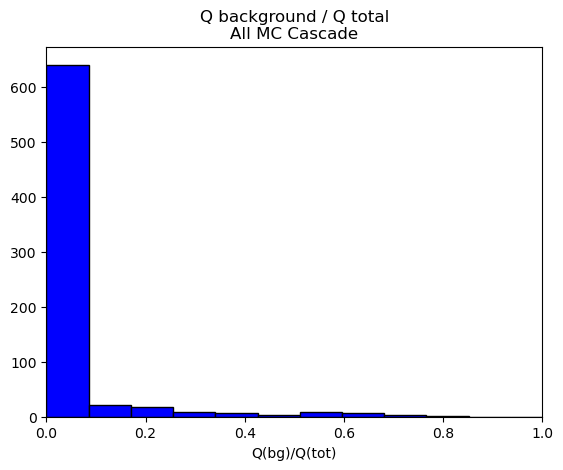

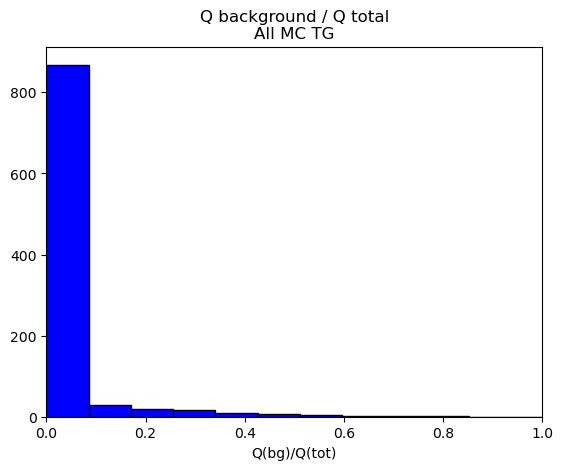

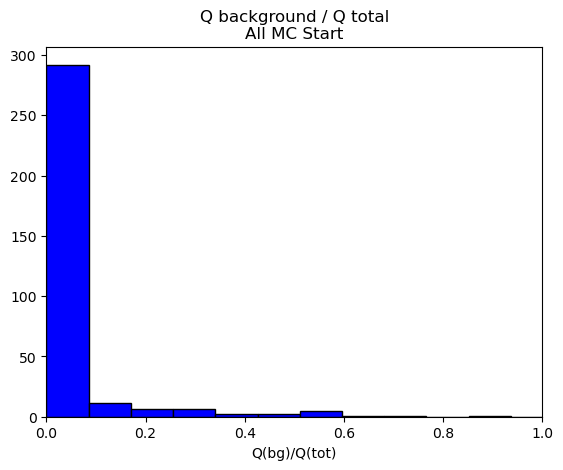

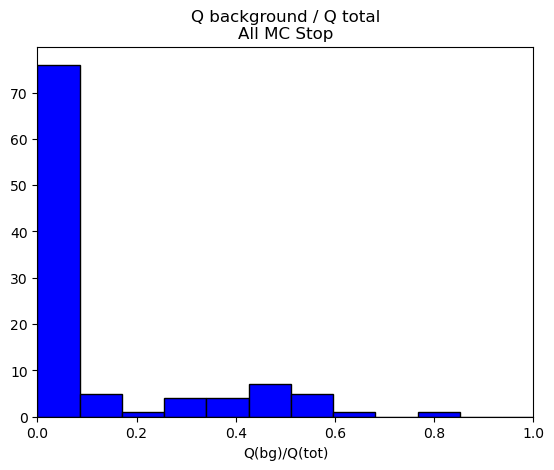

In [107]:
qratio_skim = ntn_subjects[ntn_subjects['truth_classification'] == 0]['qratio']
qratio_casc = ntn_subjects[ntn_subjects['truth_classification'] == 1]['qratio']
qratio_tg = ntn_subjects[ntn_subjects['truth_classification'] == 2]['qratio']
qratio_start = ntn_subjects[ntn_subjects['truth_classification'] == 3]['qratio']
qratio_stop = ntn_subjects[ntn_subjects['truth_classification'] == 4]['qratio']
plt.figure()
ret = plt.hist(qratio_skim, bins=20, color='blue', edgecolor='black')
bins = ret[1]
plt.xlabel('Q(bg)/Q(tot)')
#plt.ylim(0, 1000)
plt.xlim(0, 1)
plt.title('Q background / Q total\nAll MC Skim')
plt.figure()
plt.hist(qratio_casc, bins=bins, color='blue', edgecolor='black')
plt.xlabel('Q(bg)/Q(tot)')
#plt.ylim(0, 1000)
plt.xlim(0, 1)
plt.title('Q background / Q total\nAll MC Cascade')
plt.figure()
plt.hist(qratio_tg, bins=bins, color='blue', edgecolor='black')
plt.xlabel('Q(bg)/Q(tot)')
#plt.ylim(0, 1000)
plt.xlim(0, 1)
plt.title('Q background / Q total\nAll MC TG')
plt.figure()
plt.hist(qratio_start, bins=bins, color='blue', edgecolor='black')
plt.xlabel('Q(bg)/Q(tot)')
#plt.ylim(0, 1000)
plt.xlim(0, 1)
plt.title('Q background / Q total\nAll MC Start')
plt.figure()
plt.hist(qratio_stop, bins=bins, color='blue', edgecolor='black')
plt.xlabel('Q(bg)/Q(tot)')
#plt.ylim(0, 1000)
plt.xlim(0, 1)
plt.title('Q background / Q total\nAll MC Stop')

### Figure out which events to cut

In [145]:
lim1 = 0.2 #lower threshold
lim2 = 0.44 #higher threshold

(0.0, 1000.0)

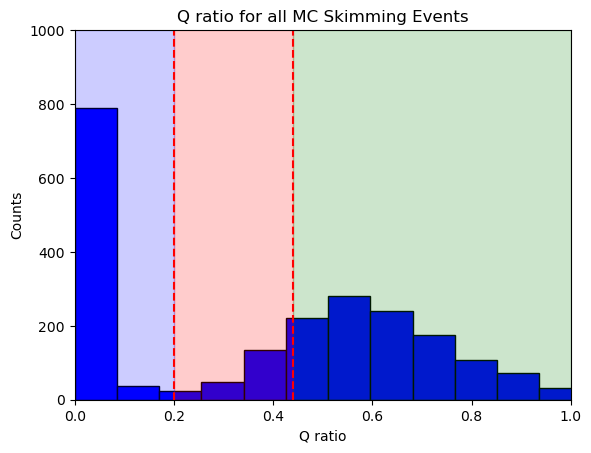

In [147]:
fig, ax = plt.subplots()
ax.hist(qratio_skim, bins=20, color='blue', edgecolor='black')
line1 = ax.plot(np.ones(100)*lim1, np.linspace(0,1000, 100), linestyle='dashed', color='red')
line2 = ax.plot(np.ones(100)*lim2, np.linspace(0,1000, 100), linestyle='dashed', color='red')
#ax.fill_between(len(qratio_skim), min(qratio_skim), max(qratio_skim), where=(qratio_skim > lim1) & (qratio_skim < lim2), alpha=0.5)
ax.axvspan(lim1, lim2, alpha=0.2, color='red')
ax.axvspan(0, lim1, alpha=0.2, color='blue')
ax.axvspan(lim2, 1, alpha=0.2, color='green')
#ax.legend([line1, line2], ['lower threshold', 'higher threshold'])

bins = ret[1]
#ax.text((lim1)/2, 500, 'NuGen Label')
#ax.text((1-lim2)/2+lim2, 500, 'Corsika Label')
ax.set_xlabel('Q ratio') 
ax.set_ylabel('Counts')
ax.set_title('Q ratio for all MC Skimming Events')
ax.set_xlim(0,1)
ax.set_ylim(0,1000)

In [108]:




ntn_subjects = ntn_subjects[(ntn_subjects['qratio'] < lim1) | (ntn_subjects['qratio'] > lim2)] #get rid of events in middle domain
new_col = []
n_changed  = 0
corsika_class = list(ntn_subjects['corsika_label'])
truth_class = list(ntn_subjects['truth_classification'])
ratio = list(np.array(ntn_subjects['qratio']))
for i in range(0, len(ntn_subjects)):
    if ratio[i] < lim1:
        new_col.append(truth_class[i])
    else:
        new_col.append(corsika_class[i])
        n_changed += 1
ntn_subjects.insert(0, 'classif', new_col)
accuracy = len(ntn_subjects[ntn_subjects['DNN Classification'] == ntn_subjects['classif']])/len(ntn_subjects)
print('Total agreement between DNN and users: {}'.format(accuracy))
print('Events discarded: {}'.format(4273 - len(ntn_subjects)))
print('Number of events using corsika classification: {}'.format(n_changed))
#ntn_subjects.to_csv('ntn_class_revised.csv')


Total agreement between DNN and users: 0.8374384236453202
Events discarded: 213
Number of events using corsika classification: 1159


### DNN vs. MC, with cut

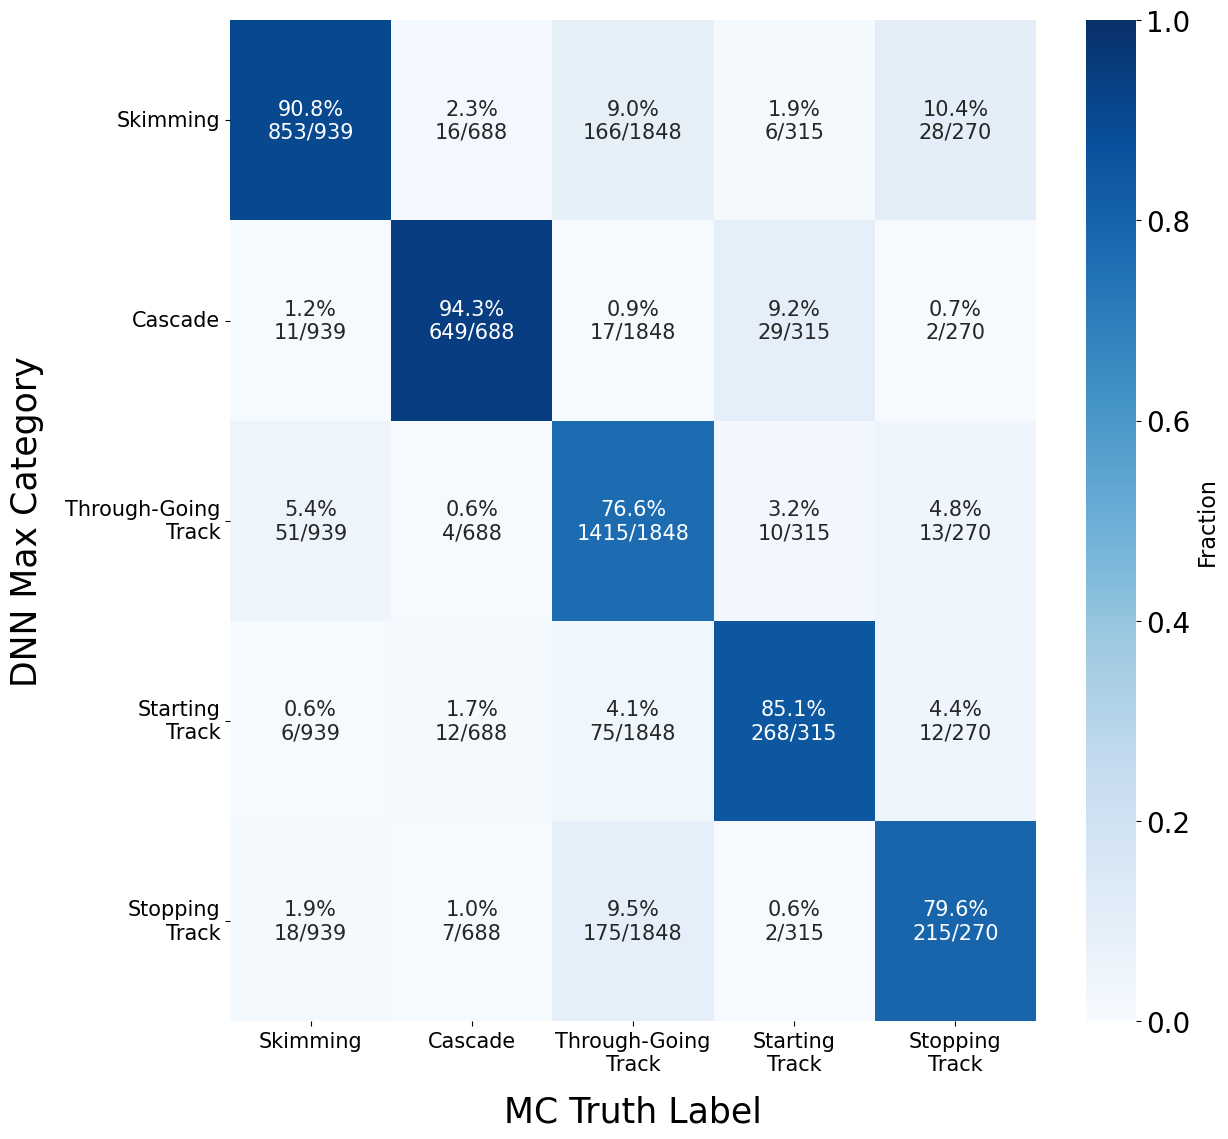

In [109]:
conf_norm = pd.crosstab(ntn_subjects['DNN Classification'], ntn_subjects['classif'], rownames=['DNN Max Category'], colnames=['MC Truth Label'], margins=False,normalize='columns')
#confusion_matrix_user_ml_55_norm_20ret = confusion_matrix_user_ml_55_norm
conf = pd.crosstab(ntn_subjects['DNN Classification'], ntn_subjects['classif'], rownames=['DNN Max Category'], colnames=['MC Truth Label'], margins=False)
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(conf_norm, annot=GetUncertaintyLabels(conf), annot_kws={"size": 15}, fmt='',cmap='Blues',xticklabels=types,yticklabels=types,vmin=0.0,vmax=1.0,cbar_kws={'label':'Fraction'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Fraction',fontsize=16)
#plt.show()
plt.ylabel('DNN Max Category',fontsize=25,labelpad=15)
plt.xlabel('MC Truth Label',fontsize=25,labelpad=15)
plt.yticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15", va="center")
plt.xticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15")
#plt.savefig("ml_user_cm_cut.png")
#plt.title('DNN vs. MC, Qratio < {}'.format(thres))
plt.show()

### User vs. MC, with cut

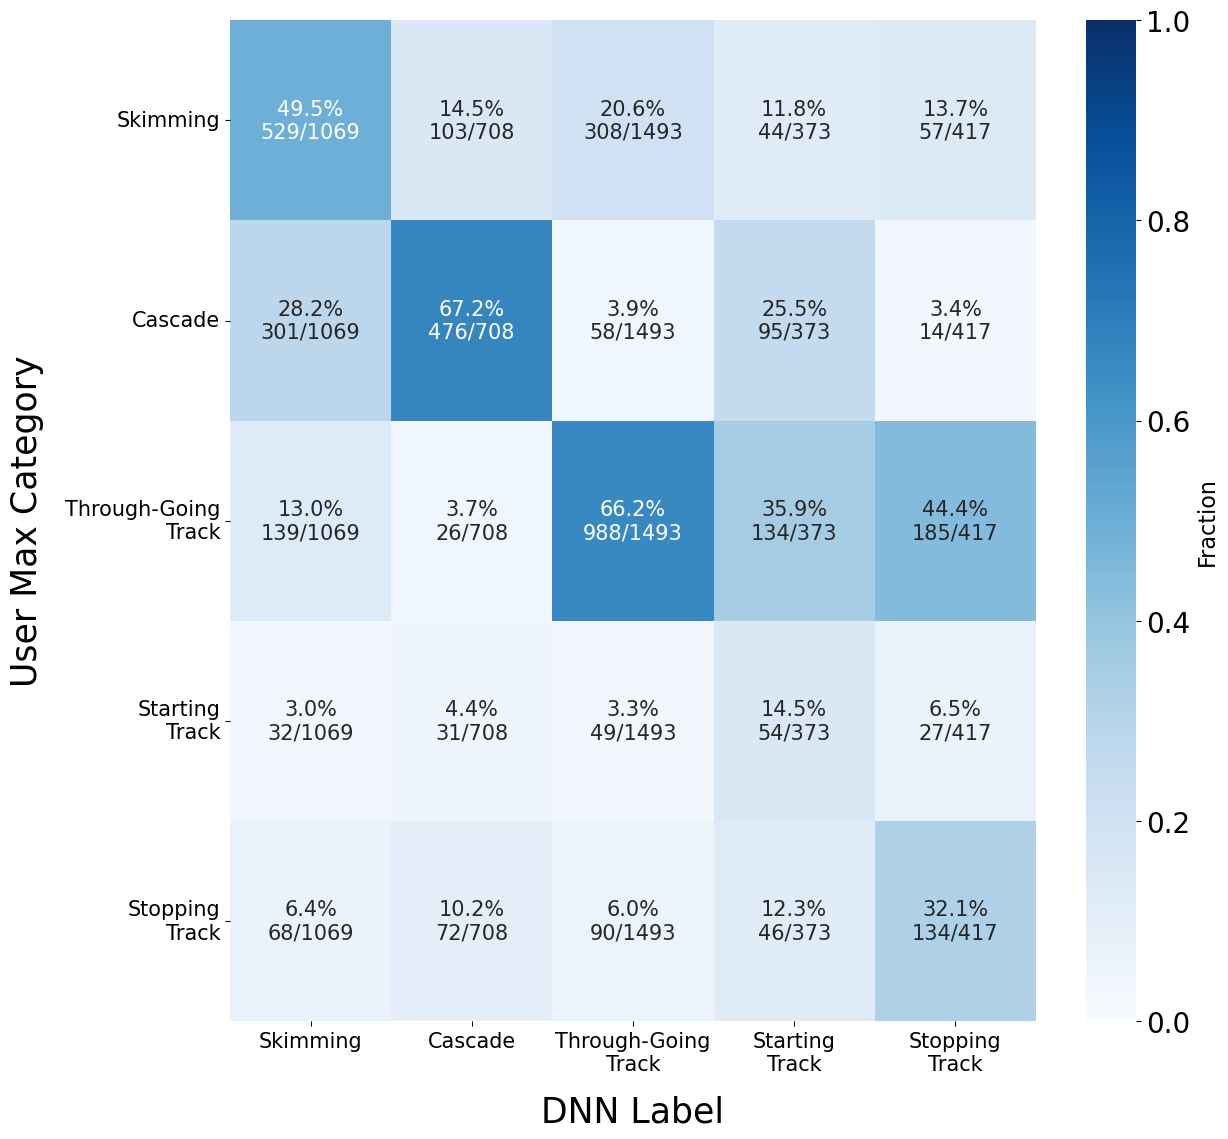

In [110]:
conf_norm = pd.crosstab(ntn_subjects['User Consensus Classification'], ntn_subjects['DNN Classification'], rownames=['User Max Category'], colnames=['DNN Label'], margins=False,normalize='columns')
#confusion_matrix_user_ml_55_norm_20ret = confusion_matrix_user_ml_55_norm
conf = pd.crosstab(ntn_subjects['User Consensus Classification'], ntn_subjects['DNN Classification'], rownames=['User Max Category'], colnames=['DNN Label'], margins=False)
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(conf_norm, annot=GetUncertaintyLabels(conf), annot_kws={"size": 15}, fmt='',cmap='Blues',xticklabels=types,yticklabels=types,vmin=0.0,vmax=1.0,cbar_kws={'label':'Fraction'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Fraction',fontsize=16)
#plt.show()
plt.ylabel('User Max Category',fontsize=25,labelpad=15)
plt.xlabel('DNN Label',fontsize=25,labelpad=15)
plt.yticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15", va="center")
plt.xticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15")
#plt.savefig("ml_user_cm_cut.png")
#plt.title('DNN vs. MC, Qratio < {}'.format(thres))
plt.show()

### User vs. MC, with cut

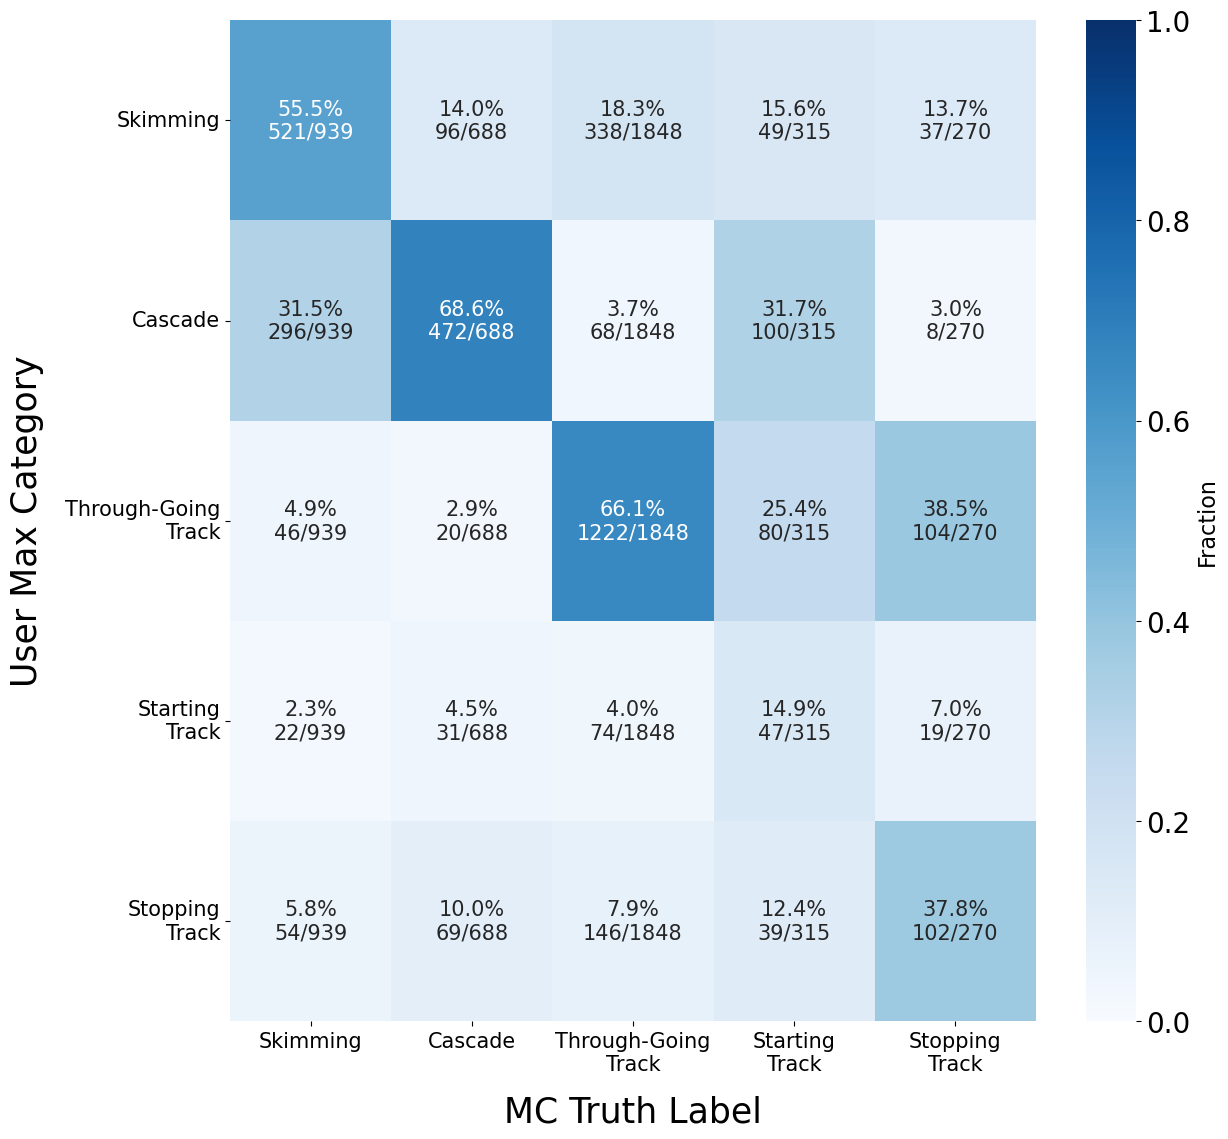

In [111]:
conf_norm = pd.crosstab(ntn_subjects['User Consensus Classification'], ntn_subjects['classif'], rownames=['User Max Category'], colnames=['MC Truth Label'], margins=False,normalize='columns')
#confusion_matrix_user_ml_55_norm_20ret = confusion_matrix_user_ml_55_norm
conf = pd.crosstab(ntn_subjects['User Consensus Classification'], ntn_subjects['classif'], rownames=['User Max Category'], colnames=['MC Truth Label'], margins=False)
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(conf_norm, annot=GetUncertaintyLabels(conf), annot_kws={"size": 15}, fmt='',cmap='Blues',xticklabels=types,yticklabels=types,vmin=0.0,vmax=1.0,cbar_kws={'label':'Fraction'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Fraction',fontsize=16)
#plt.show()
plt.ylabel('User Max Category',fontsize=25,labelpad=15)
plt.xlabel('MC Truth Label',fontsize=25,labelpad=15)
plt.yticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15", va="center")
plt.xticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15")
#plt.savefig("ml_user_cm_cut.png")
#plt.title('DNN vs. MC, Qratio < {}'.format(thres))
plt.show()